In [23]:
from argparse import ArgumentParser
from clusterer import Clustering
from visualizer import Visualizer
import pandas as pd
import argparse
import yaml
import matplotlib.pyplot as plt
from data_loader import DataLoader
import seaborn as sns

In [24]:
config = yaml.load(open("../config/dmg_mailer_data.yml"), Loader=yaml.FullLoader)
dataloader = DataLoader(config['data'])
temp = dataloader.extract_data(path = "..\data\input\cluster_data.pkl", fraction = 0.5)

.
.
.
... Data loaded successfully with shape:  (8908711, 16)
Data sampled with fraction: 0.5 and shape:  (4454356, 16)
Preprocessing data complete with shape:,  (4454356, 27)


In [25]:
method = 'kmeans'

### K-Means with 2 clusters

In [26]:
# Initialize clusterer
config['clustering']['kmeans']['n_clusters'] = 2
c = Clustering(clustering_config = config['clustering'],    data_config = config['data'])
v = Visualizer(visual_config     = config['visualization'], data_config = config['data'])

In [27]:
# Perform clustering
data, centers = c.cluster_data(data = temp, clustering_method = method)

Clustering using kmeans...
Done! [1 0 1 ... 1 0 0]


Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using PCA..


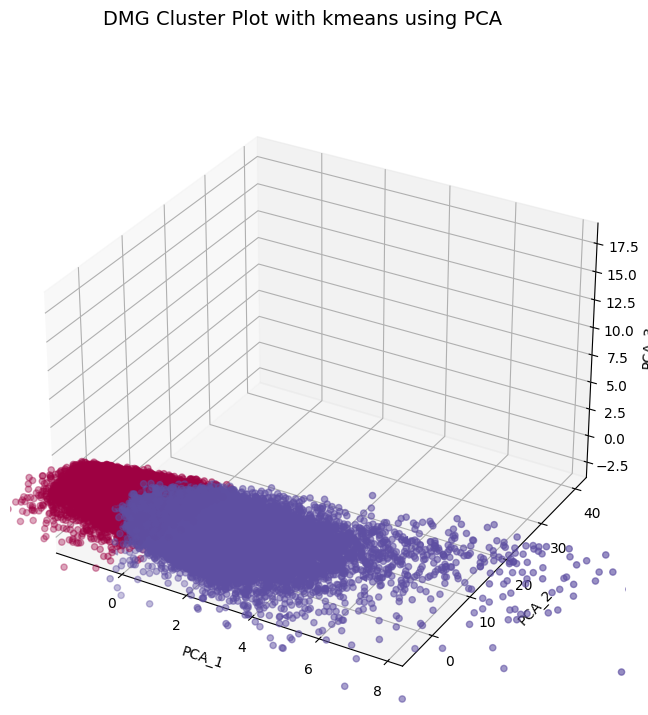

In [28]:
# Visualize clusters
v.visualize_clusters(data = data, plot = '3d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'PCA')

Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using PCA..


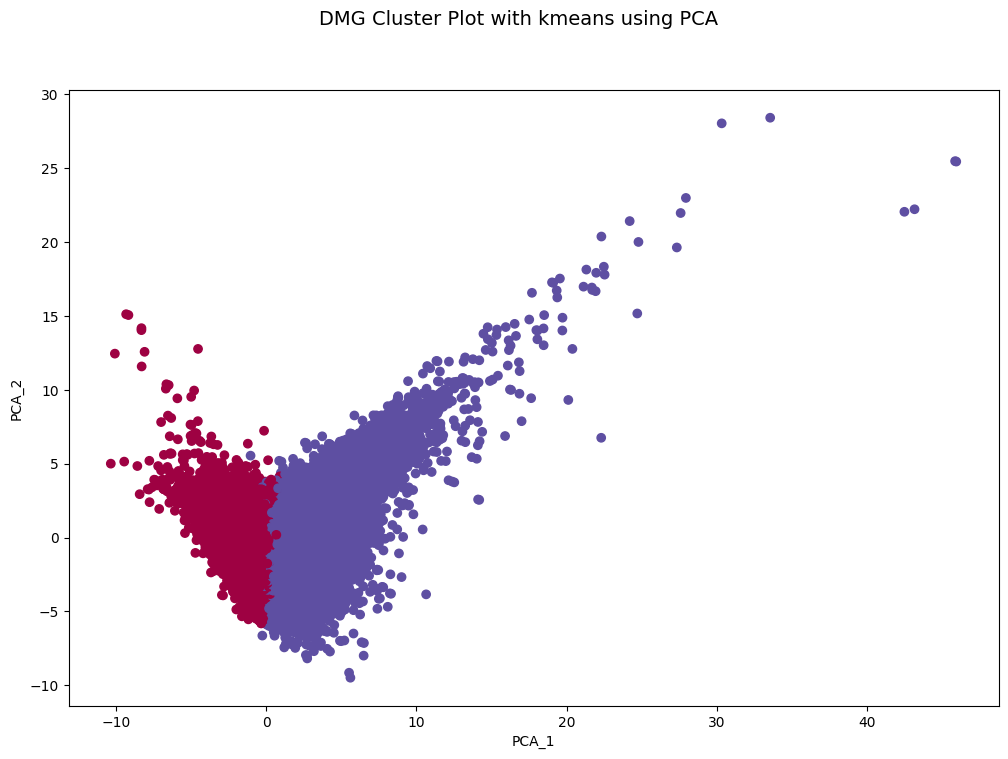

In [29]:
v.visualize_clusters(data = data, plot = '2d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'PCA')

In [30]:
# v.visualize_clusters(data = data, plot = '2d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'TSNE')

In [31]:
cluster_stats = c.describe_clusters(data, features = ['ACTUAL_DEBT_VALUE', 'UTILIZATION', 'RECENT_LOAN_AGE', 'MR_AMT', 'DTI', 'ACTUAL_INCOME', 'PRE_MAIL', 'AGE'])
cluster_stats

KeyError: "['dti'] not in index"

In [ ]:
cluster_stats.to_csv('../data/output/output_stats_two.csv')

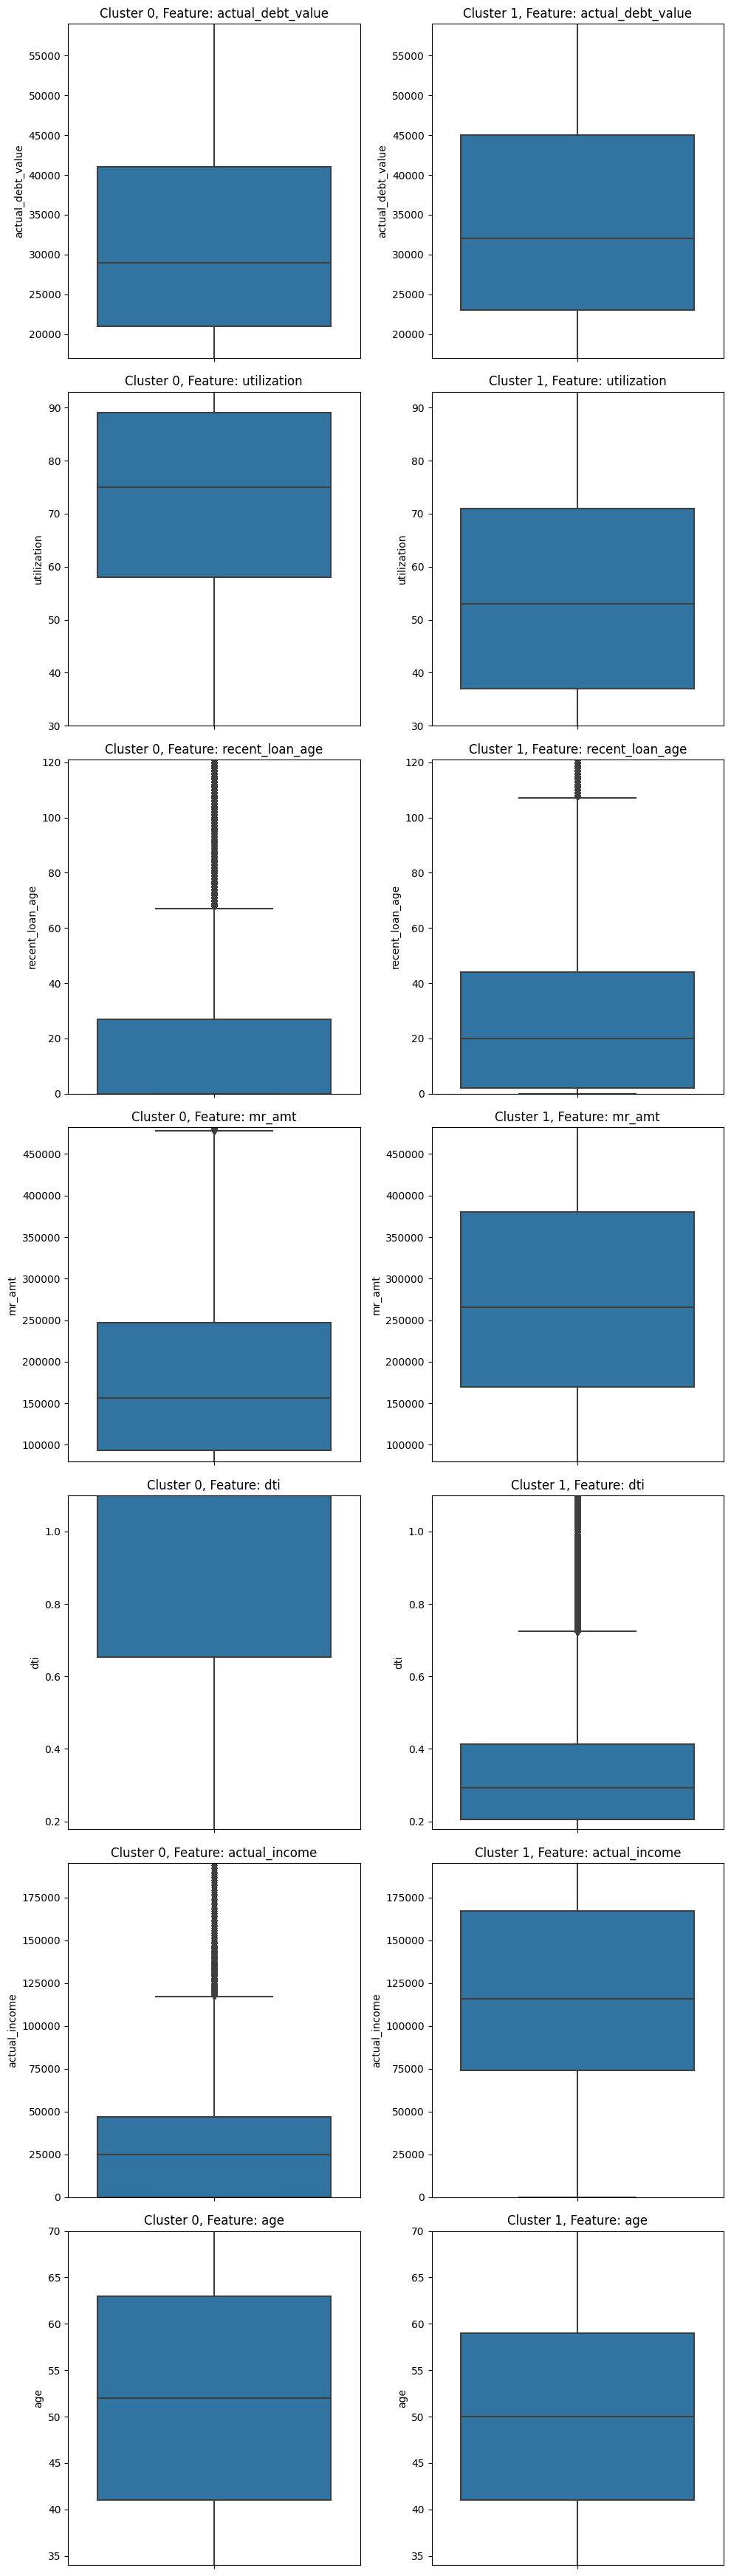

In [ ]:
v.boxplot_features(data, features = ['ACTUAL_DEBT_VALUE', 'UTILIZATION', 'RECENT_LOAN_AGE', 'MR_AMT', 'DTI', 'ACTUAL_INCOME', 'AGE'])

### K-means with 3 clusters

In [59]:
# Initialize clusterer
config['clustering']['kmeans']['n_clusters'] = 3
c = Clustering(clustering_config = config['clustering'],    data_config = config['data'])
v = Visualizer(visual_config     = config['visualization'], data_config = config['data'])

In [60]:
# Perform clustering
data, centers = c.cluster_data(data = temp, clustering_method = method)

Clustering using kmeans...
Done! [2 1 2 ... 2 1 1]


Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using PCA..


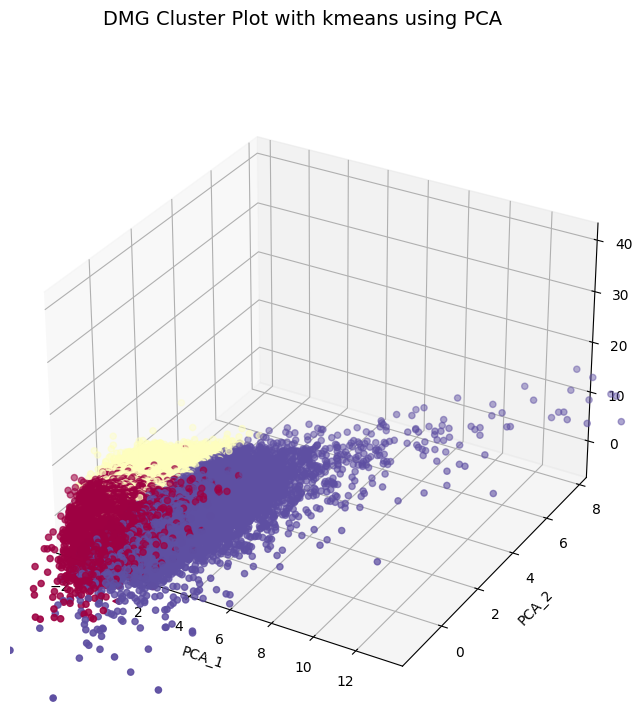

In [13]:
# Visualize clusters
v.visualize_clusters(data = data, plot = '3d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'PCA')

Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using TSNE..
Reducing samples for TSNE visualization..


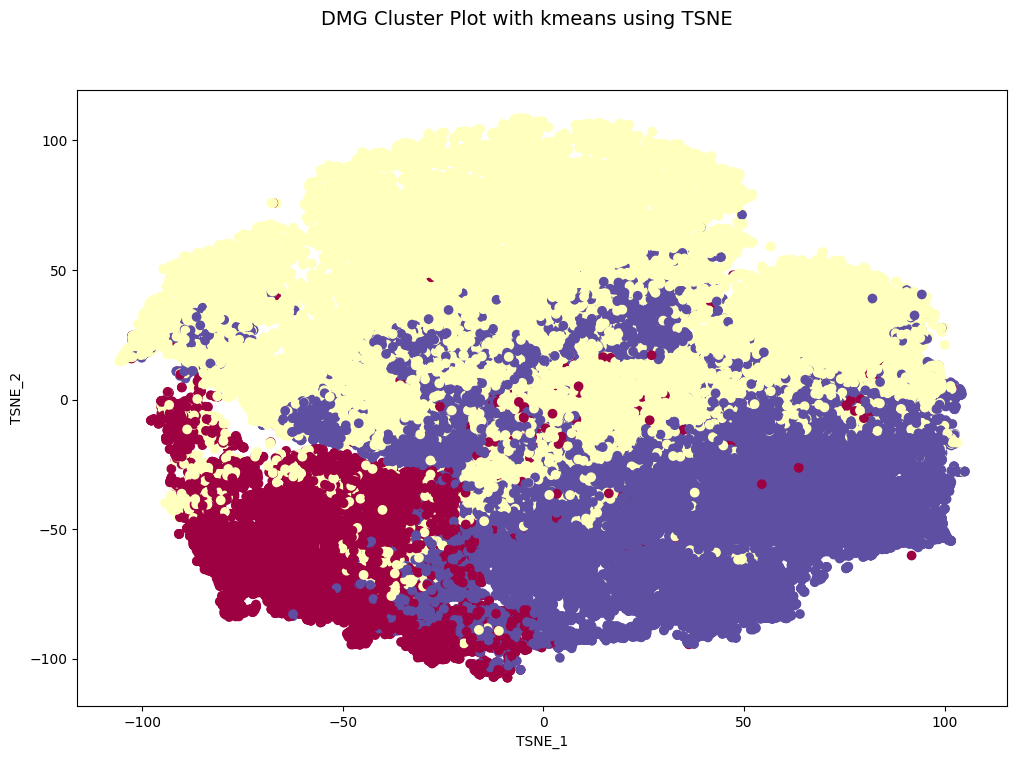

In [14]:
v.visualize_clusters(data = data, plot = '2d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'TSNE')

Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using PCA..


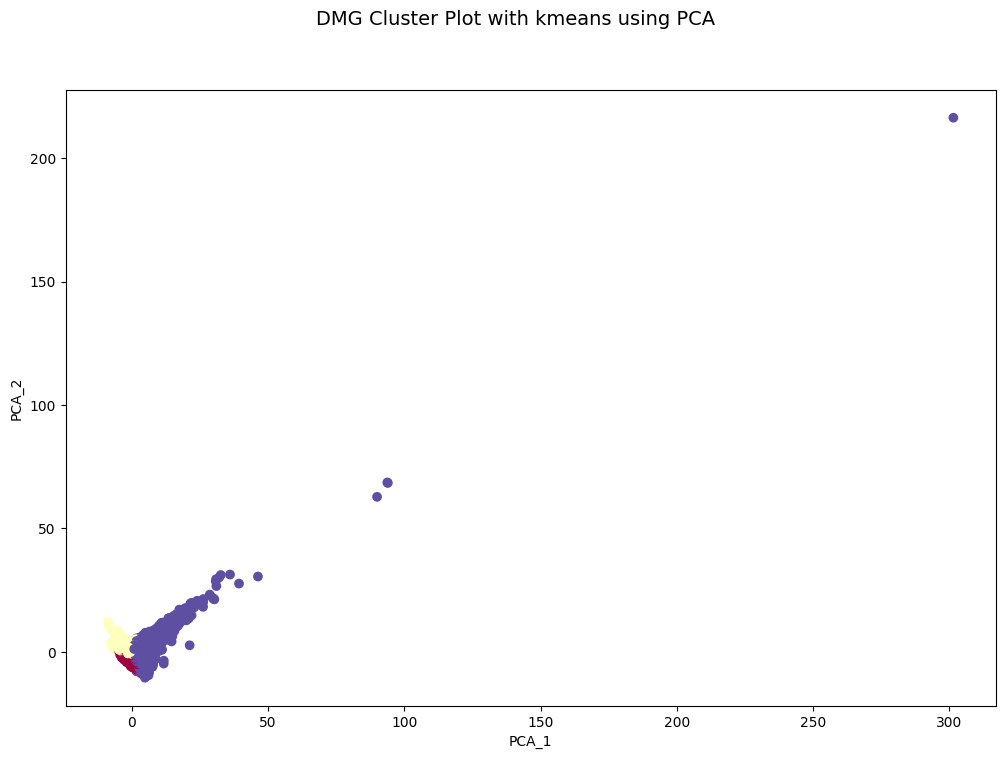

In [15]:
v.visualize_clusters(data = data, plot = '2d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'PCA')

In [32]:
temp = data.copy()

In [41]:
data.groupby('cluster')['Response'].agg({'mean', 'sum', 'count'})

,sum,mean,count
cluster,,,
0,362.0,0.004800,75418
1,89.0,0.004600,19346
2,202.0,0.004365,46281


In [64]:
cluster_mapping = {1:0, 0:1}
data['cluster'] = data['cluster'].replace(cluster_mapping)

In [65]:
cluster_stats = c.describe_clusters(data, features = ['ACTUAL_DEBT_VALUE', 'UTILIZATION', 'RECENT_LOAN_AGE', 'MR_AMT', 'AGE_OF_BUY', 'ACTUAL_INCOME', 'PRE_MAIL', 'AGE'])
cluster_stats

cluster                          0         1         2
actual_debt_value count   949245.0  241612.0  590885.0
                  median   24000.0   32000.0   43000.0
                  q25      19000.0   23000.0   33000.0
                  q75      33000.0   45000.0   57000.0
actual_income     count   949245.0  241612.0  590885.0
                  median   46000.0   70000.0  124000.0
                  q25      11000.0   41000.0   72000.0
                  q75      77000.0  115000.0  194000.0
age               count   949245.0  241612.0  590885.0
                  median      49.0      60.0      50.0
                  q25         38.0      52.0      42.0
                  q75         59.0      68.0      59.0
age_of_buy        count   949245.0  241612.0  590885.0
                  median       1.0       1.0       3.0
                  q25          0.0       0.0       1.0
                  q75          2.0       3.0       5.0
mr_amt            count   949245.0  241612.0  590885.0
                  median  186000.0   95000.0  327000.0
                  q25     124000.0   58000.0  234000.0
                  q75     261000.0  151000.0  445000.0
pre_mail          count   949245.0  241612.0  590885.0
                  median       2.0       3.0       7.0
                  q25          1.0       1.0       4.0
                  q75          5.0       6.0      11.0
recent_loan_age   count   949245.0  241612.0  590885.0
                  median       0.0     154.0      17.0
                  q25          0.0     115.0       4.0
                  q75         19.0     202.0      29.0
utilization       count   949245.0  241612.0  590885.0
                  median      70.0      55.0      55.0
                  q25         50.0      37.0      39.0
                  q75         86.0      74.0      74.0

### Summary of 3 clusters

- Cluster 0 represents younger individuals with lower debt and income, possibly at the early stages of their financial journey.
- Cluster 1 represents slightly older individuals with moderate debt and income, likely in a stable financial situation.
- Cluster 2 represents individuals with higher debt, higher income, and higher credit utilization, potentially more established and financially active.

In [66]:
cluster_stats.to_csv('../data/output/output_stats.csv')

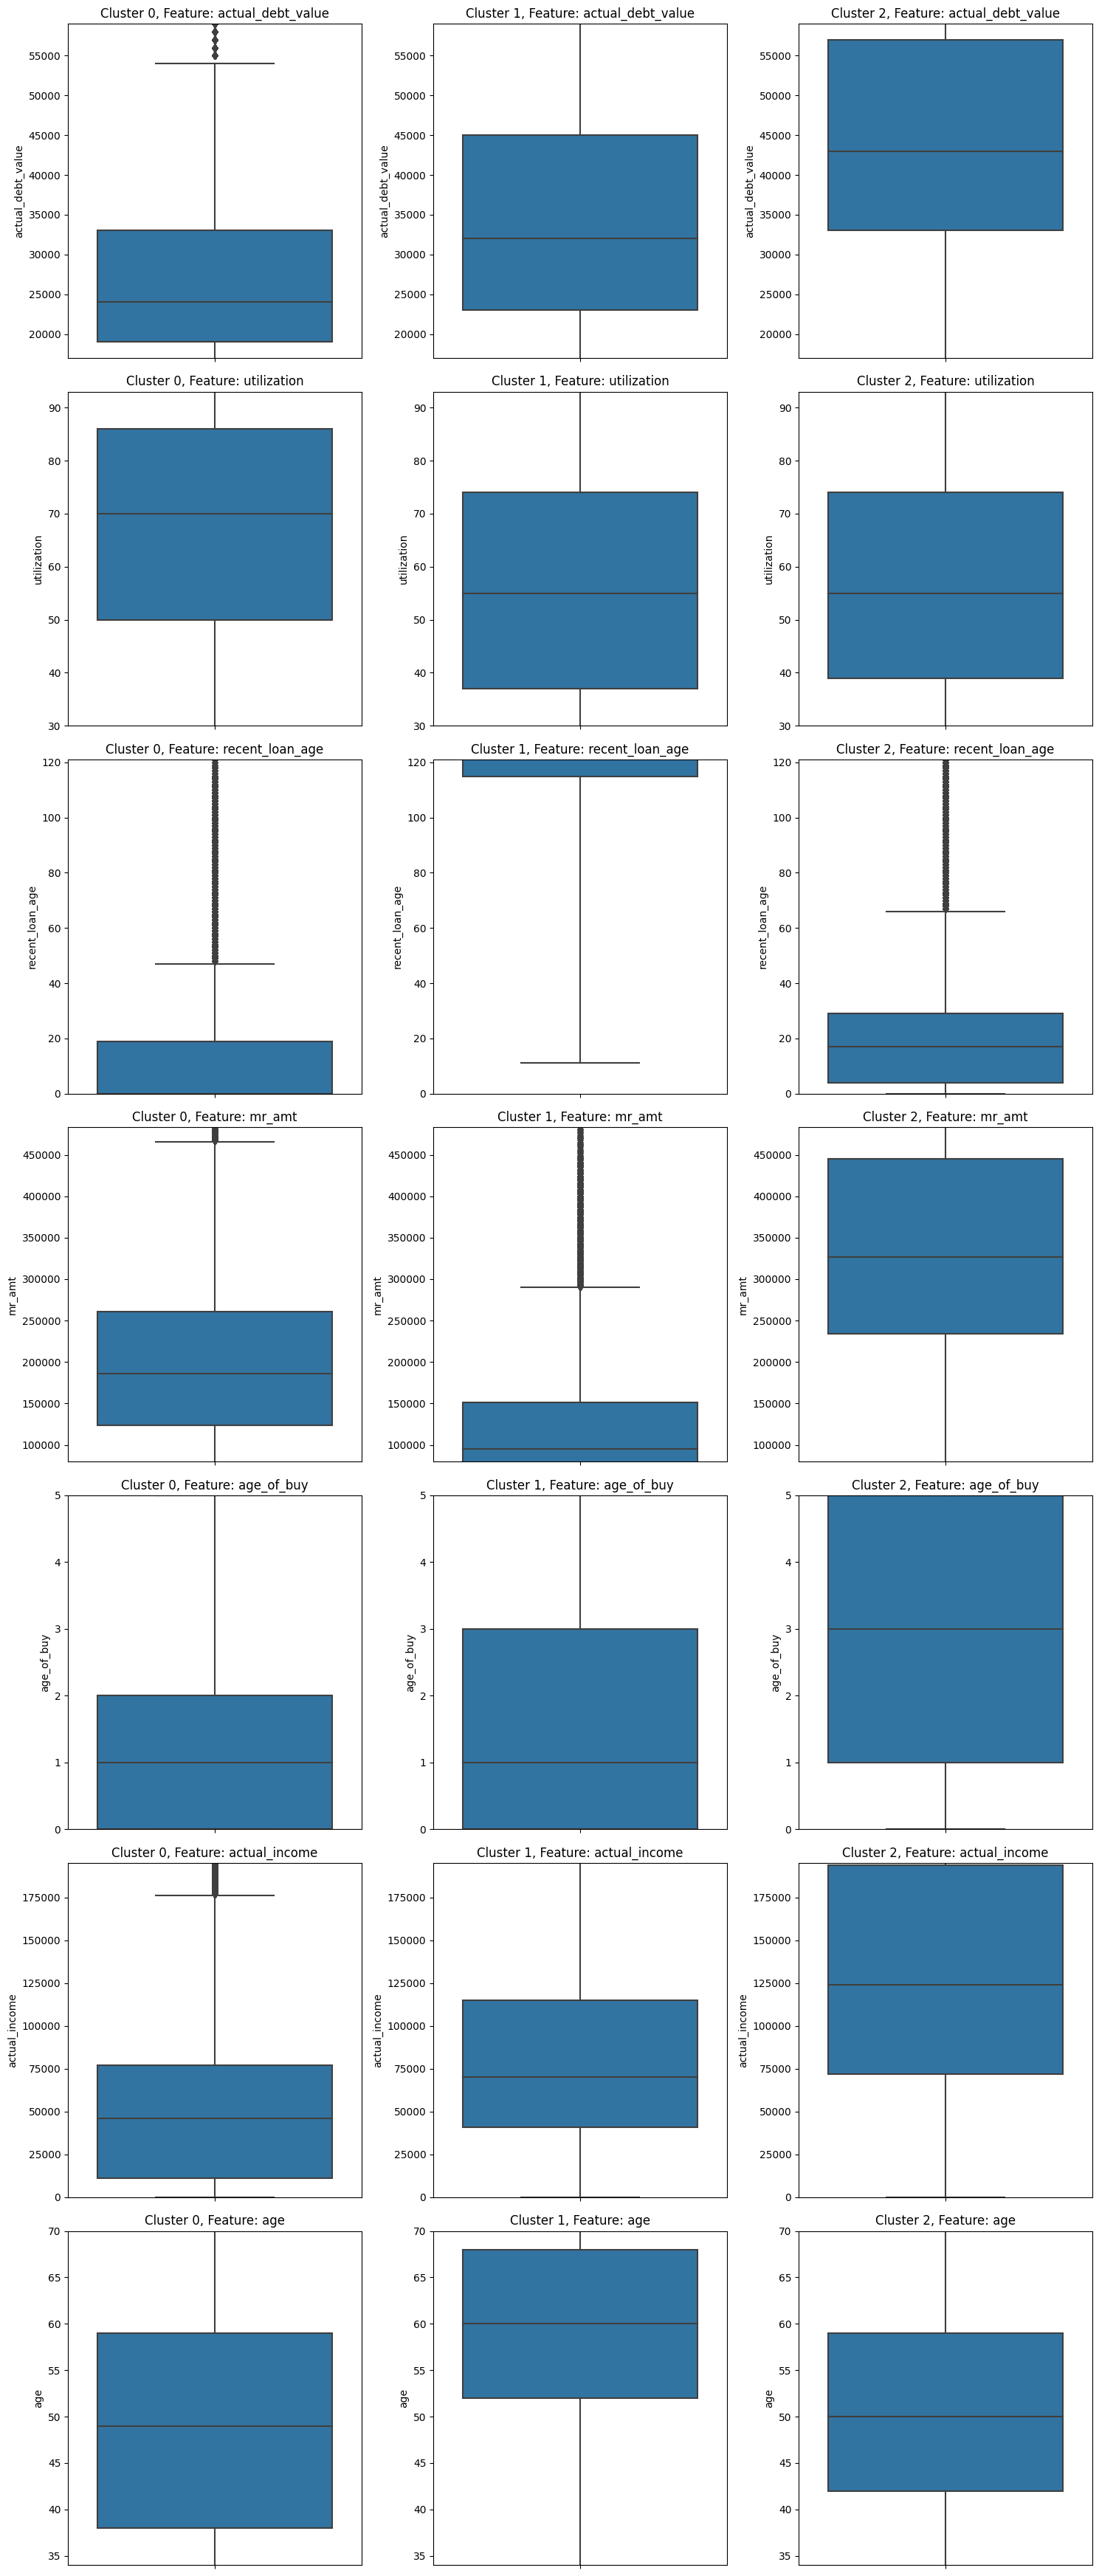

In [67]:
v.boxplot_features(data, features = ['ACTUAL_DEBT_VALUE', 'UTILIZATION', 'RECENT_LOAN_AGE', 'MR_AMT', 'AGE_OF_BUY', 'ACTUAL_INCOME', 'AGE'])

### K-means with 4 clusters

In [68]:
# Initialize clusterer
config['clustering']['kmeans']['n_clusters'] = 4
c = Clustering(clustering_config = config['clustering'],    data_config = config['data'])
v = Visualizer(visual_config     = config['visualization'], data_config = config['data'])

In [69]:
# Perform clustering
data, centers = c.cluster_data(data = temp, clustering_method = method)

Clustering using kmeans...
Done! [1 3 3 ... 3 2 2]


Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using PCA..


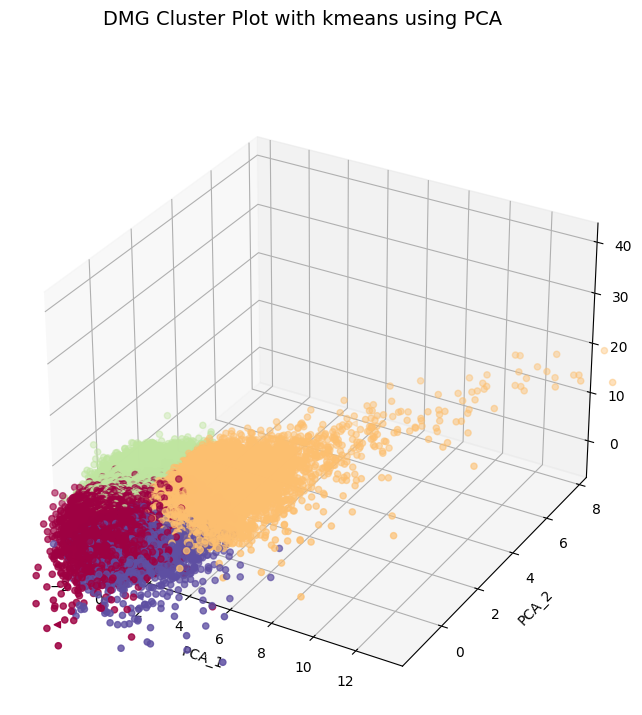

In [20]:
# Visualize clusters
v.visualize_clusters(data = data, plot = '3d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'PCA')

Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using PCA..


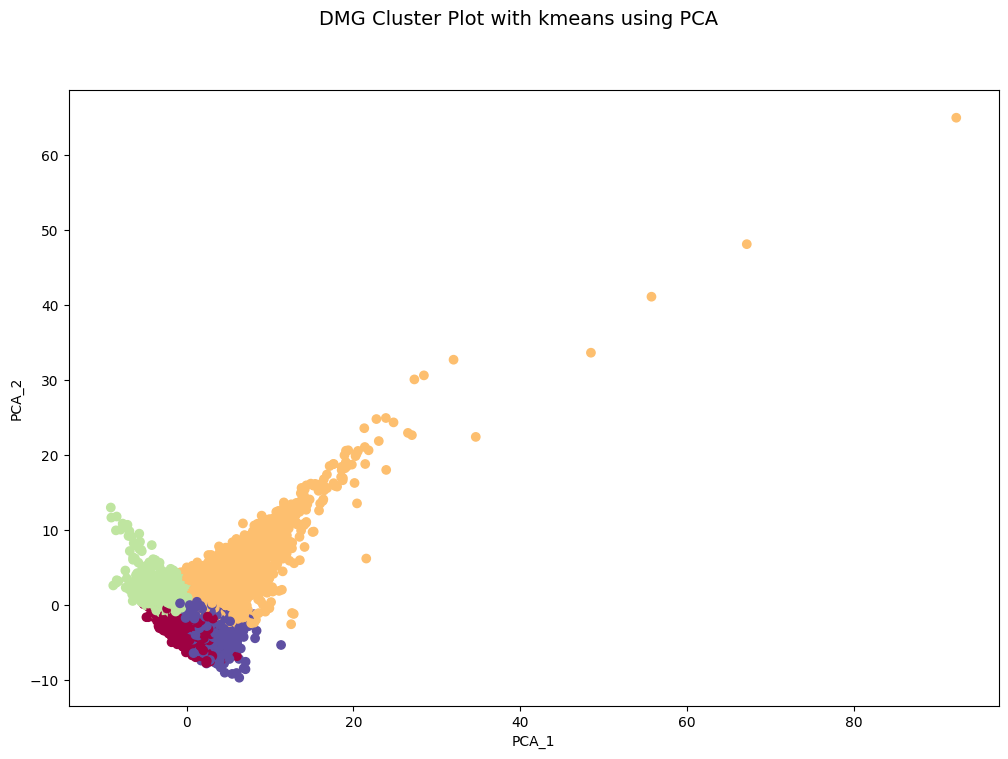

In [21]:
v.visualize_clusters(data = data, plot = '2d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'PCA')

Plotting Unscaled Version: True
Performing Dimensionality Reduction with scaled data using TSNE..
Reducing samples for TSNE visualization..


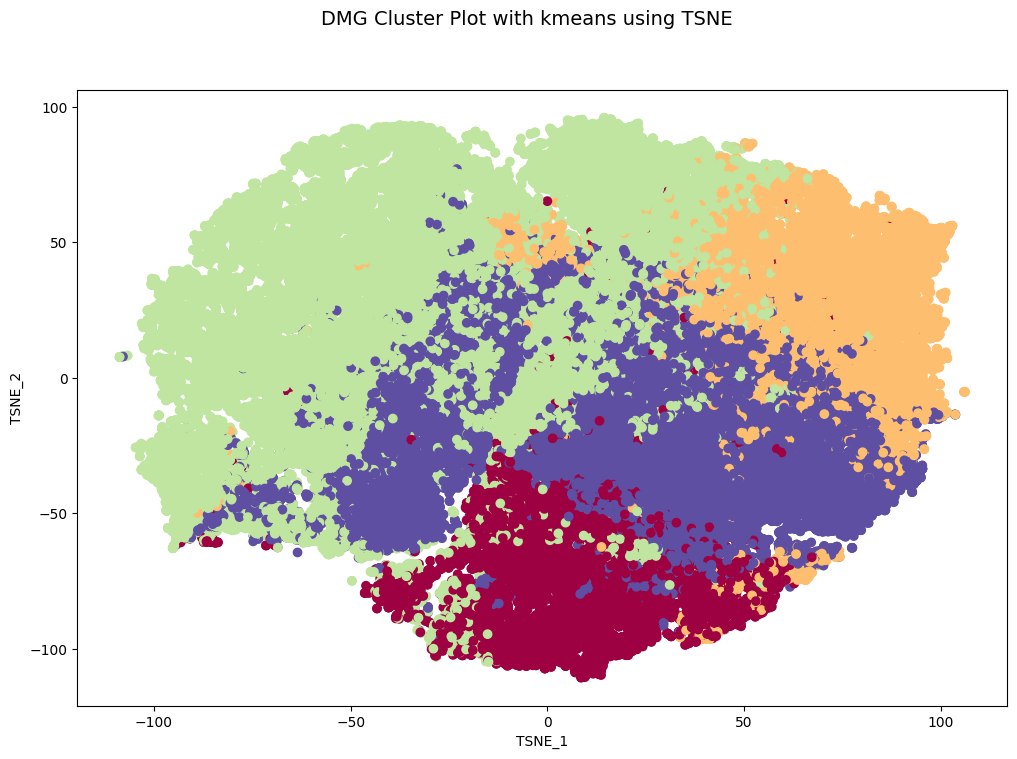

In [22]:
v.visualize_clusters(data = data, plot = '2d', clustering_method = method, plot_unscaled = True, centers = centers, dimensionality_reduction = 'TSNE')

In [70]:
cluster_mapping = {2: 0, 0: 1, 3: 2, 1: 3}
data['cluster'] = data['cluster'].replace(cluster_mapping)

In [72]:
cluster_stats = c.describe_clusters(data, features = ['ACTUAL_DEBT_VALUE', 'UTILIZATION', 'RECENT_LOAN_AGE', 'MR_AMT', 'AGE_OF_BUY', 'ACTUAL_INCOME', 'PRE_MAIL', 'AGE'])
cluster_stats

cluster                          0         1         2         3
actual_debt_value count   791478.0  222290.0  496877.0  271097.0
                  median   23000.0   32000.0   37000.0   45000.0
                  q25      18000.0   22000.0   30000.0   33000.0
                  q75      32000.0   45000.0   50000.0   59000.0
actual_income     count   791478.0  222290.0  496877.0  271097.0
                  median   47000.0   71000.0   69000.0  187000.0
                  q25      11000.0   42000.0   36000.0  126000.0
                  q75      83000.0  118000.0  114000.0  249000.0
age               count   791478.0  222290.0  496877.0  271097.0
                  median      47.0      60.0      53.0      47.0
                  q25         37.0      52.0      44.0      41.0
                  q75         58.0      68.0      63.0      55.0
age_of_buy        count   791478.0  222290.0  496877.0  271097.0
                  median       1.0       1.0       3.0       2.0
                  q25          0.0       0.0       2.0       0.0
                  q75          2.0       3.0       5.0       3.0
mr_amt            count   791478.0  222290.0  496877.0  271097.0
                  median  189000.0   94000.0  208000.0  414000.0
                  q25     127000.0   57000.0  141000.0  328000.0
                  q75     260000.0  152000.0  280000.0  524000.0
pre_mail          count   791478.0  222290.0  496877.0  271097.0
                  median       2.0       3.0       8.0       5.0
                  q25          0.0       1.0       5.0       2.0
                  q75          4.0       6.0      11.0       8.0
recent_loan_age   count   791478.0  222290.0  496877.0  271097.0
                  median       0.0     161.0      10.0      20.0
                  q25          0.0     121.0       0.0      12.0
                  q75         20.0     205.0      27.0      30.0
utilization       count   791478.0  222290.0  496877.0  271097.0
                  median      71.0      56.0      57.0      56.0
                  q25         52.0      38.0      39.0      39.0
                  q75         88.0      75.0      75.0      74.0

### Summary of 4 clusters

- Cluster 0 - This cluster includes a large number of relatively young individuals with moderate debt values and income levels. They have the highest credit utilization, indicating they rely more on credit for expenses. They might benefit from debt settlement programs to manage their credit utilization and avoid excessive debt accumulation.

- Cluster 1 - This cluster comprises a smaller group of older individuals with balanced debt-to-income ratios. They have the lowest credit utilization and mortgage amounts, suggesting responsible borrowing behavior. Debt settlement programs might not be the best fit for this group, but they could consider financial advisory services or debt consolidation options.

- Cluster 2 - This cluster represents individuals in their middle age with moderately recent borrowing activities and moderate debt levels. They have a higher credit utilization compared to Cluster 1, indicating diverse financial needs. Debt settlement programs could help negotiate and manage their debts effectively.

- Cluster 3 - Cluster 3 stands out with the highest income and debt values. They have relatively lower credit utilization, suggesting financial stability despite significant debt. Debt settlement programs might not be the primary focus for this group, but personalized financial planning and investment advice could be beneficial.

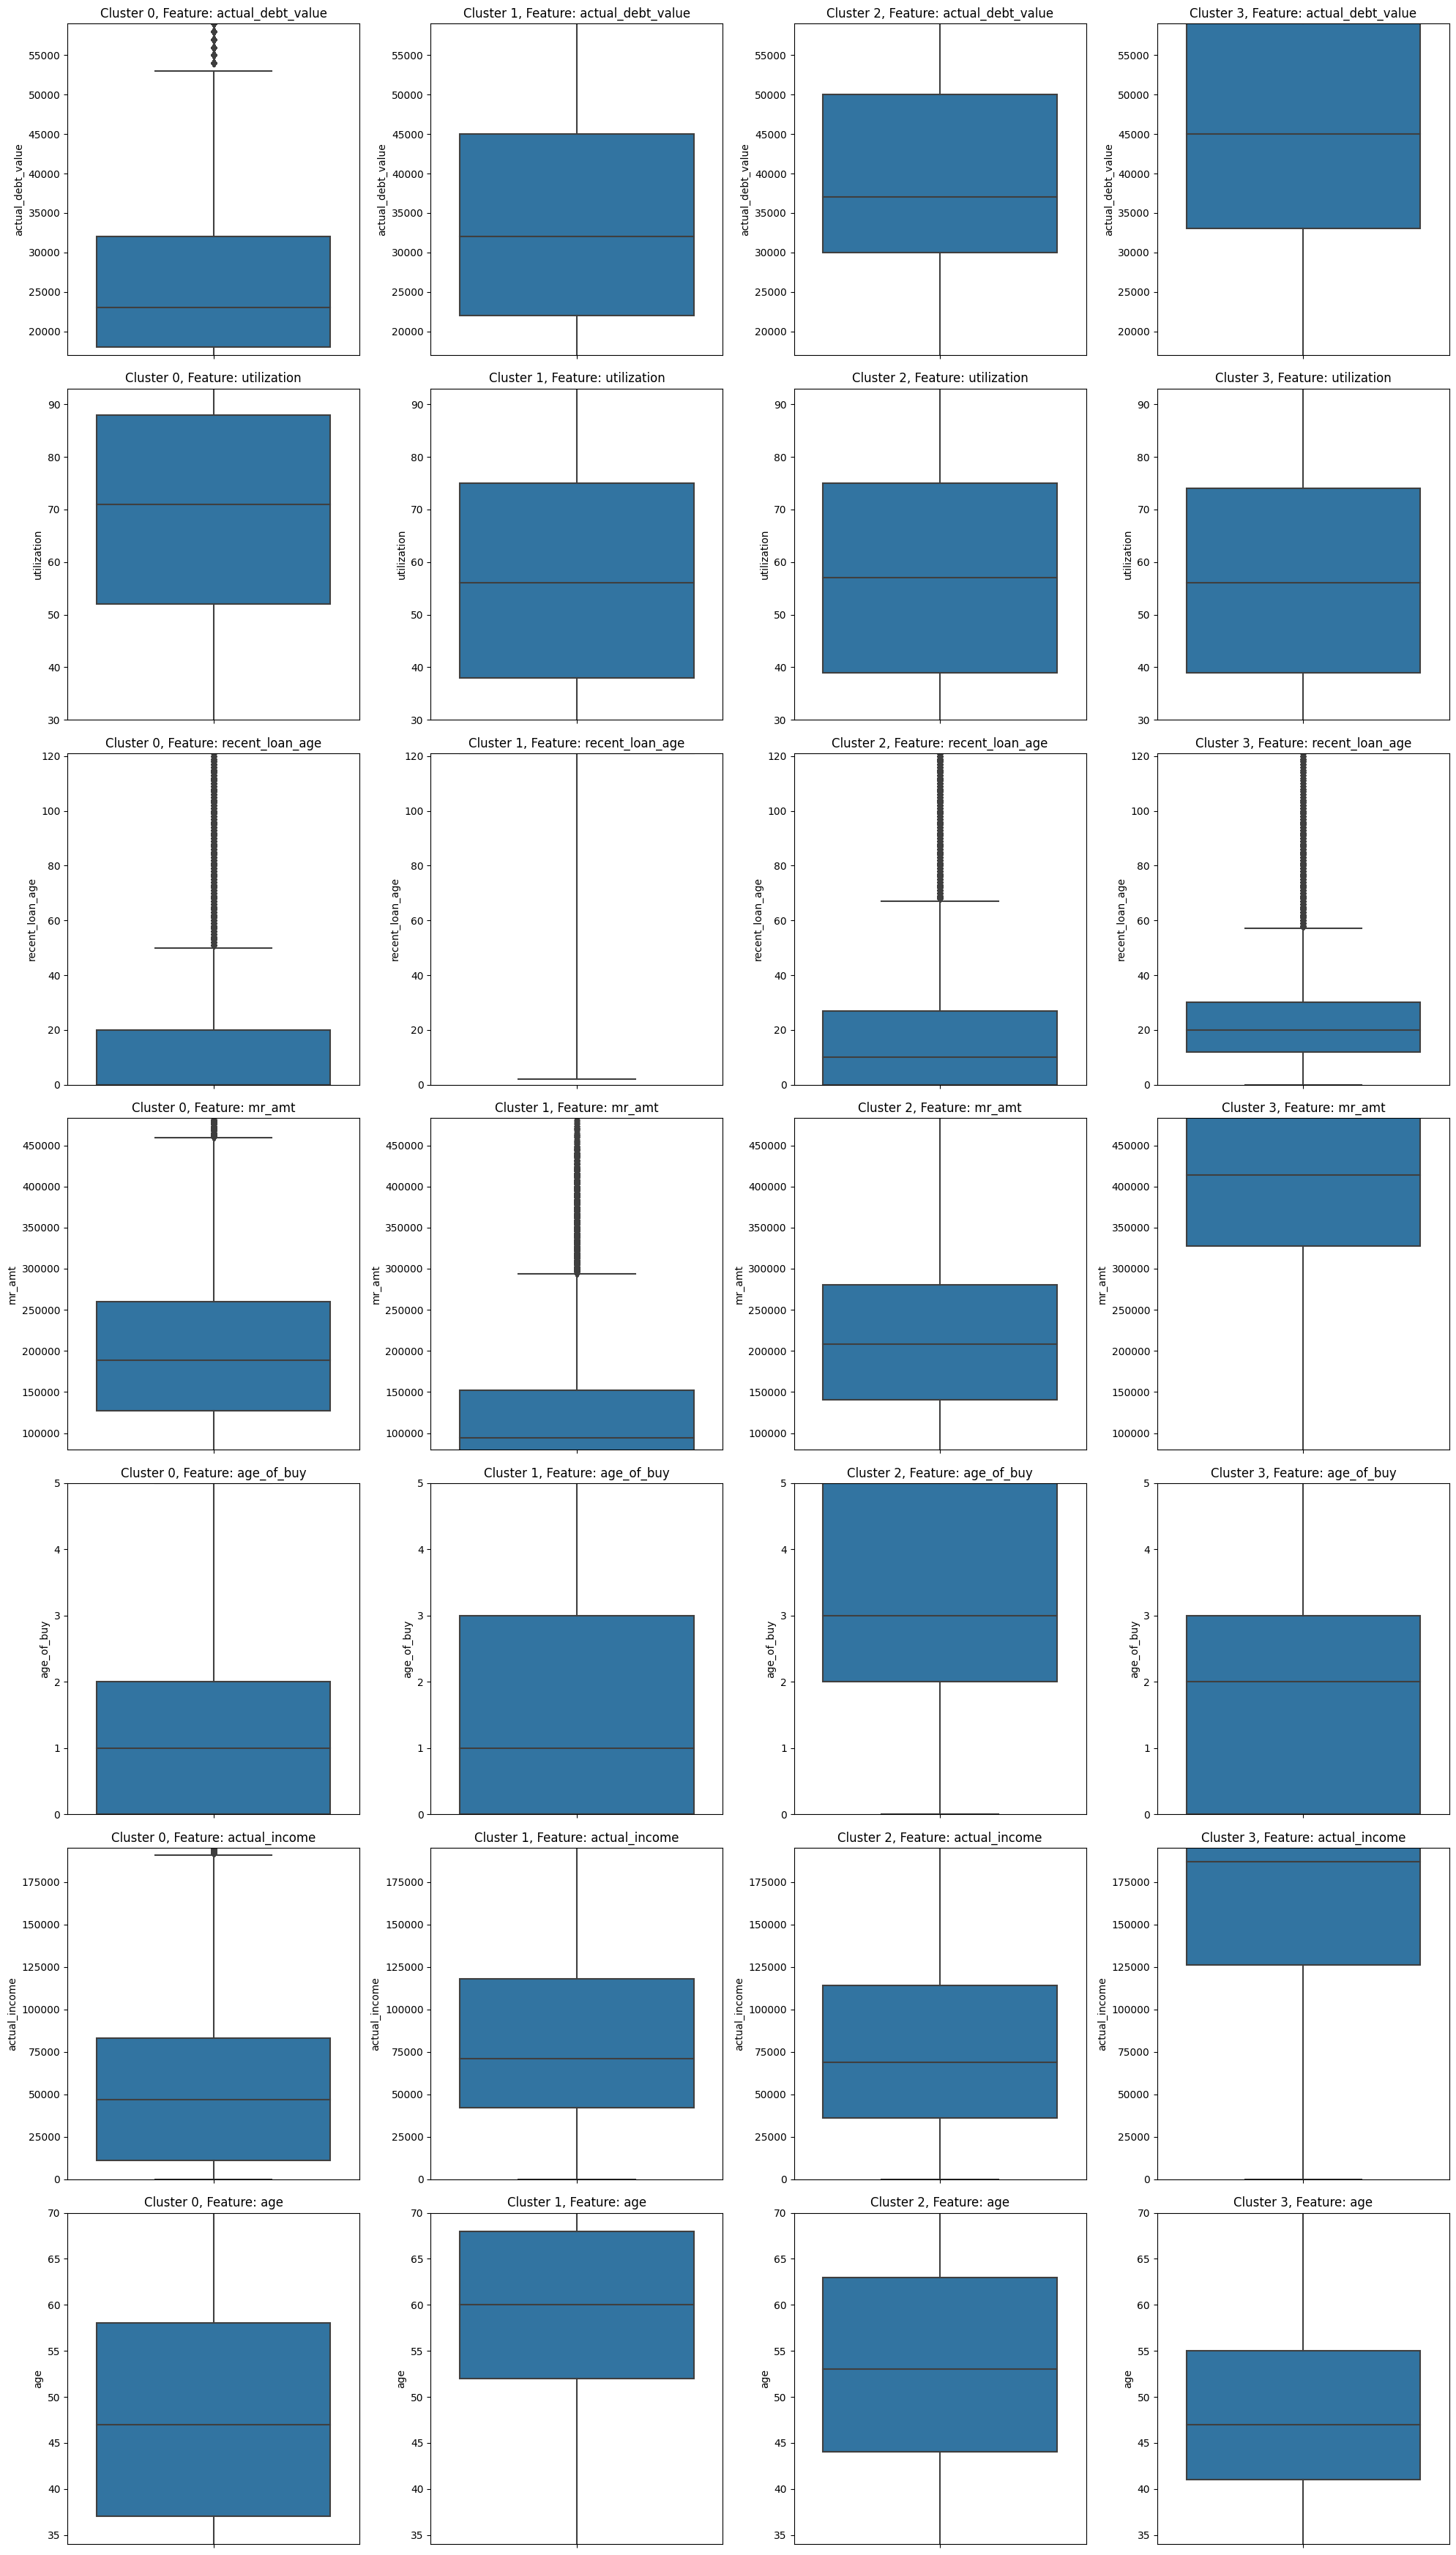

In [58]:
v.boxplot_features(data, features = ['ACTUAL_DEBT_VALUE', 'UTILIZATION', 'RECENT_LOAN_AGE', 'MR_AMT', 'AGE_OF_BUY', 'ACTUAL_INCOME', 'AGE'])